In [111]:
import cv2
import os
import string

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pickle

In [49]:
dataset_path = "asl_dataset/"

In [50]:
images = []
labels = []
for i in range(10):
    folder_path = os.path.join(dataset_path,str(i))

    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path,str(file))
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Skipping invalid image: {image_path}")
            continue
        image = cv2.resize(image,(64,64))
        images.append(image)
        labels.append(i)

In [51]:
for label, char in enumerate(string.ascii_lowercase):
    folder_path = os.path.join(dataset_path, char)
    label = label + 10

    for file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Skipping invalid image: {image_path}")
            continue
        image = cv2.resize(image, (64, 64))
        images.append(image)
        labels.append(label)

Skipping invalid image: asl_dataset/a\.ipynb_checkpoints


In [52]:
images = np.array(images)
labels = np.array(labels)

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

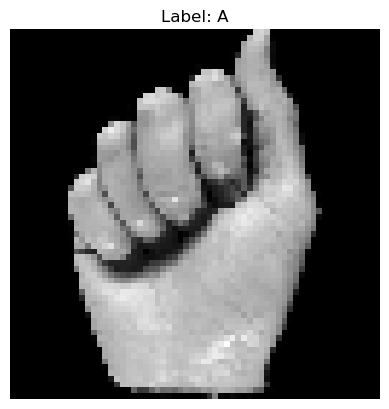

In [53]:
index = np.where(labels == 10)[0][0]
plt.imshow(images[index], cmap='gray')
plt.title("Label: A")
plt.axis('off')

In [54]:
hog_features = []
for image in images:
    hog_feature = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_features.append(hog_feature)

In [55]:
hog_features = np.array(hog_features)

In [81]:
features_train, features_test, label_train, label_test = train_test_split(hog_features,labels,test_size=0.2, random_state=3)
print(hog_features.shape,features_train.shape,features_test.shape)
print(labels.shape,label_train.shape,label_test.shape)

(2515, 1764) (2012, 1764) (503, 1764)
(2515,) (2012,) (503,)


In [82]:
scaler = StandardScaler()

In [83]:
features_train = scaler.fit_transform(features_train)

In [84]:
features_test = scaler.transform(features_test)

In [86]:
for model_name, model in all_models.items():
    model.fit(features_train, label_train)
    print(f"{model_name} training done!!!")

LogisticRegression training done!!!
XGBClassifier training done!!!
DecisionTreeClassifier training done!!!
RandomForestClassifier training done!!!
SVC training done!!!


In [87]:
for model_name, model in all_models.items():
    training_prediction = model.predict(features_train)
    training_accuracy = accuracy_score(training_prediction, label_train)
    print(f"Accuracy of {model_name} is {training_accuracy}")

Accuracy of LogisticRegression is 1.0
Accuracy of XGBClassifier is 1.0
Accuracy of DecisionTreeClassifier is 0.7519880715705766
Accuracy of RandomForestClassifier is 1.0
Accuracy of SVC is 1.0


In [88]:
for model_name, model in all_models.items():
    testing_prediction = model.predict(features_test)
    testing_accuracy = accuracy_score(testing_prediction, label_test)
    print(f"Accuracy of {model_name} is {testing_accuracy}")

Accuracy of LogisticRegression is 0.9781312127236581
Accuracy of XGBClassifier is 0.9284294234592445
Accuracy of DecisionTreeClassifier is 0.6560636182902585
Accuracy of RandomForestClassifier is 0.9622266401590457
Accuracy of SVC is 0.9860834990059643


In [90]:
def predict(image_path, model, scaler):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Invalid image path")
    image = cv2.resize(image, (64, 64))
    hog_feature = hog(
        image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_feature = hog_feature.reshape(1, -1)
    hog_feature = scaler.transform(hog_feature)
    prediction = model.predict(hog_feature)
    return prediction[0]

In [110]:
image_path = []
for i in range(10):
    image_path.append(f"E:/Jupyter Notebook/ML Mini Projects/Hand Gesture Prediction/asl_dataset/{i}/hand1_{i}_right_seg_2_cropped.jpeg")
for label, char in enumerate(string.ascii_lowercase):
    image_path.append(f"E:/Jupyter Notebook/ML Mini Projects/Hand Gesture Prediction/asl_dataset/{char}/hand1_{char}_right_seg_2_cropped.jpeg")
for path in image_path:
    str = ""
    for model_name, model in all_models.items():
        pred = predict(path, model, scaler)
        if pred >= 10:
            str = str + f"{model_name} : {chr(pred - 10 + ord('a'))} "
        else:
            str = str + f"{model_name} : {pred} "
    print(str)
    print("-" * 100)

LogisticRegression : 0 XGBClassifier : 0 DecisionTreeClassifier : o RandomForestClassifier : 0 SVC : 0 
----------------------------------------------------------------------------------------------------
LogisticRegression : 1 XGBClassifier : 1 DecisionTreeClassifier : 1 RandomForestClassifier : 1 SVC : 1 
----------------------------------------------------------------------------------------------------
LogisticRegression : 2 XGBClassifier : 2 DecisionTreeClassifier : v RandomForestClassifier : 2 SVC : 2 
----------------------------------------------------------------------------------------------------
LogisticRegression : 3 XGBClassifier : 3 DecisionTreeClassifier : 3 RandomForestClassifier : 3 SVC : 3 
----------------------------------------------------------------------------------------------------
LogisticRegression : 4 XGBClassifier : 4 DecisionTreeClassifier : 4 RandomForestClassifier : 4 SVC : 4 
----------------------------------------------------------------------------